<a href="https://colab.research.google.com/github/ArtyomShabunin/SMOPA/blob/main/lesson_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://prana-system.com/files/110/rds_color_full.png" alt="tot image" width="300"  align="center"/> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://mpei.ru/AboutUniverse/OficialInfo/Attributes/PublishingImages/logo1.jpg" alt="mpei image" width="200" align="center"/>
<img src="https://mpei.ru/Structure/Universe/tanpe/structure/tfhe/PublishingImages/tot.png" alt="tot image" width="100"  align="center"/>

---

# **–°–∏—Å—Ç–µ–º—ã –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –∏ –ø—Ä–µ–¥–∏–∫—Ç–∏–≤–Ω–æ–π –∞–Ω–∞–ª–∏—Ç–∏–∫–∏ –≤ —Ç–µ–ø–ª–æ–≤–æ–π –∏ –≤–æ–∑–æ–±–Ω–æ–≤–ª—è–µ–º–æ–π —ç–Ω–µ—Ä–≥–µ—Ç–∏–∫–µ**  

# ***–ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–∞–Ω—è—Ç–∏—è***


---

# –ó–∞–Ω—è—Ç–∏–µ ‚Ññ7
# –ú–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –º–µ—Ç–æ–¥–∞–º–∏ –≥–ª—É–±–æ–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
**2 –∞–ø—Ä–µ–ª—è 2025–≥.**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
# from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, r2_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler

from imblearn.under_sampling import RandomUnderSampler

from tqdm import tqdm
import json

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# device = torch.device('cpu')
device

device(type='cpu')

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [3]:
import gdown
import warnings
warnings.filterwarnings('ignore')
gdown.download('https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ', verify=False)

data = pd.read_parquet("./data_modes.gzip")

Downloading...
From (original): https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ
From (redirected): https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ&confirm=t&uuid=bcba50b0-a9bd-4721-ab7b-07614e79da8d
To: /content/data_modes.gzip
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 173M/173M [00:04<00:00, 42.9MB/s]


In [4]:
data.shape

(1082098, 56)

In [5]:
data.head()

GTA1.DBinPU.Aldi  GTA1.DBinPU.Alvna  GTA1.DBinPU.Alzzo  \
2023-02-26 06:59:50        225.550000          -4.398000          -0.082000   
2023-02-26 07:00:00        225.610769          -4.327115          -0.089769   
2023-02-26 07:00:10        225.436897          -4.363724          -0.091000   
2023-02-26 07:00:20        225.710833          -4.306625          -0.093000   
2023-02-26 07:00:30        226.355000          -4.183118          -0.091500   

                     GTA1.DBinPU.Bo  GTA1.DBinPU.DlPkf  GTA1.DBinPU.DlPtgft  \
2023-02-26 06:59:50         101.044         113.088000            33.709000   
2023-02-26 07:00:00         101.044         113.151231            33.709000   
2023-02-26 07:00:10         101.044         113.039759            33.633586   
2023-02-26 07:00:20         101.044         113.053458            33.506500   
2023-02-26 07:00:30         101.044         113.730941            33.818529   

                     GTA1.DBinPU.DlPvf  GTA1.DBinPU.fi  GTA1.DBinPU.hmGTD  \
2023-02-26 06:59:50           0.200000       56.615000             442.64   
2023-02-26 07:00:00           0.200000       56.615000             442.64   
2023-02-26 07:00:10           0.200207       56.516103             442.64   
2023-02-26 07:00:20           0.200750       56.376000             442.64   
2023-02-26 07:00:30           0.200000       56.199353             442.64   

                     GTA1.DBinPU.hmTG  ...  heated_air  zzo_is_open  \
2023-02-26 06:59:50           444.536  ...       False        False   
2023-02-26 07:00:00           444.536  ...       False        False   
2023-02-26 07:00:10           444.536  ...       False        False   
2023-02-26 07:00:20           444.536  ...       False        False   
2023-02-26 07:00:30           444.536  ...       False        False   

                     full_power_mode  partial_power_mode  increas_power_mode  \
2023-02-26 06:59:50             True               False               False   
2023-02-26 07:00:00             True               False               False   
2023-02-26 07:00:10             True               False               False   
2023-02-26 07:00:20             True               False               False   
2023-02-26 07:00:30             True               False               False   

                     decreas_power_mode  start_up_mode  shutdown_mode  \
2023-02-26 06:59:50               False          False          False   
2023-02-26 07:00:00               False          False          False   
2023-02-26 07:00:10               False          False          False   
2023-02-26 07:00:20               False          False          False   
2023-02-26 07:00:30               False          False          False   

                     stopped_state_mode  air_heating_mode  
2023-02-26 06:59:50               False             False  
2023-02-26 07:00:00               False             False  
2023-02-26 07:00:10               False             False  
2023-02-26 07:00:20               False             False  
2023-02-26 07:00:30               False             False  

[5 rows x 56 columns]

–ß—Ç–µ–Ω–∏–µ —Ñ–∞–π–ª–∞ —Å –æ–ø–∏—Å–∞–Ω–∏–µ–º —Å–∏–≥–Ω–∞–ª–æ–≤

In [7]:
# import gdown
# url = "https://drive.google.com/drive/folders/1RtrAevJUYSgTbp0YUztxEBB8_VcvjgGH?usp=drive_link"
# gdown.download_folder(url, quiet=True, verify=False)

with open(f'./option_0/description.json', 'r', encoding = "utf-8") as f:
    description = json.load(f)

–°–æ—Å—Ç–∞–≤–∏–º —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —Ç—Ä–∞–∫—Ç–æ–≤–∫–∏ –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–π —Å–∏–≥–Ω–∞–ª–æ–≤

In [8]:
kks_to_description = {param['real_kks']: f"{param['description']}, [{param['unit']}]"
for param in description if param['real_kks'] in data.columns}

description_to_kks = { f"{param['description']}, [{param['unit']}]": param['real_kks']
for param in description if param['real_kks'] in data.columns}

## –°—Ñ–æ—Ä–º–∏—Ä—É–µ–º –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

–í—ã–±–µ—Ä–µ–º —Å–∏–≥–Ω–∞–ª—ã –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å. –ò—Å–∫–ª—é—á–∏–º –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –∫–æ—Ç–æ—Ä—ã—Ö –≤—ã–¥–µ–ª—è–ª–∏—Å—å —Ü–µ–ª–µ–≤—ã–µ —Ä–µ–∂–∏–º—ã.

In [9]:
feature_columns = [
    'GTA1.DBinPU.Alzzo', 'GTA1.DBinPU.Bo', 'GTA1.DBinPU.DlPkf',
    'GTA1.DBinPU.DlPtgft', 'GTA1.DBinPU.DlPvf', 'GTA1.DBinPU.fi',
    'GTA1.DBinPU.hmGTD', 'GTA1.DBinPU.hmTG', 'GTA1.DBinPU.P1mvhTG',
    'GTA1.DBinPU.Pk',
    'GTA1.DBinPU.Pmvh', 'GTA1.DBinPU.PmvhMOGTD',
    'GTA1.DBinPU.PmvhMOTG', 'GTA1.DBinPU.PmvyhMOGTD',
    'GTA1.DBinPU.PmvyhMOTG', 'GTA1.DBinPU.Prazrjag_navhode',
    'GTA1.DBinPU.Ptgpd', 'GTA1.DBinPU.Ptgvh',
    'GTA1.DBinPU.Pvh',
    'GTA1.DBinPU.Pvyhlg',
    'GTA1.DBinPU.Qtg',
    'GTA1.DBinPU.Tk',
    'GTA1.DBinPU.Tn', 'GTA1.DBinPU.Tt', 'GTA1.DBinPU.Tvh1',
    'GTA1.DBinPU.Pzad'
    ]

target_columns = [
    'full_power_mode',
    'partial_power_mode',
    'increas_power_mode',
    'decreas_power_mode',
    'start_up_mode',
    'shutdown_mode',
    'stopped_state_mode'
]

–í –¥–∞–Ω–Ω—ã—Ö –ø—Ä—Å—É—Ç—Å—Ç–≤—É—é—Ç –ø—Ä–∏–º–µ—Ä—ã –∫–æ—Ç–æ—Ä—ã–µ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º —Ä–µ–∂–∏–º–∞–º. –ö–ª–∞—Å—Å —Ç–∞–∫–∏—Ö –∑–∞–¥–∞—á –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è **–º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π —Å –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ–º –∫–ª–∞—Å—Å–æ–≤** (*multi-label classification*). –ù–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç —Ç–∫–∏—Ö –ø—Ä–∏–º–µ—Ä–æ–≤.

In [10]:
data[data[target_columns].sum(axis=1) > 1][target_columns]

full_power_mode  partial_power_mode  increas_power_mode  \
2023-04-07 09:20:00            False               False               False   
2023-04-07 09:20:10            False               False               False   
2023-04-07 09:20:20            False               False               False   
2023-04-07 09:20:30            False               False               False   
2023-04-07 09:20:40            False               False               False   
...                              ...                 ...                 ...   
2023-07-07 19:53:40            False               False               False   
2023-07-07 19:53:50            False               False               False   
2023-07-07 19:59:20            False               False               False   
2023-07-07 20:06:00            False               False               False   
2023-07-07 20:13:50            False               False               False   

                     decreas_power_mode  start_up_mode  shutdown_mode  \
2023-04-07 09:20:00                True           True          False   
2023-04-07 09:20:10                True           True          False   
2023-04-07 09:20:20                True           True          False   
2023-04-07 09:20:30                True           True          False   
2023-04-07 09:20:40               False           True           True   
...                                 ...            ...            ...   
2023-07-07 19:53:40               False           True           True   
2023-07-07 19:53:50               False           True           True   
2023-07-07 19:59:20               False           True           True   
2023-07-07 20:06:00               False           True           True   
2023-07-07 20:13:50               False           True           True   

                     stopped_state_mode  
2023-04-07 09:20:00               False  
2023-04-07 09:20:10               False  
2023-04-07 09:20:20               False  
2023-04-07 09:20:30               False  
2023-04-07 09:20:40               False  
...                                 ...  
2023-07-07 19:53:40               False  
2023-07-07 19:53:50               False  
2023-07-07 19:59:20               False  
2023-07-07 20:06:00               False  
2023-07-07 20:13:50               False  

[193 rows x 7 columns]

In [11]:
data.loc[data['adjustment_range'], ['start_up_mode']] = False
data.loc[data['adjustment_range'], ['shutdown_mode']] = False
data.loc[data['increase_power'], ['shutdown_mode']] = False
data.loc[data['decreas_power_mode'], ['start_up_mode']] = False

In [12]:
data[data[target_columns].sum(axis=1) > 1][target_columns]

full_power_mode  partial_power_mode  increas_power_mode  \
2023-04-07 09:20:40            False               False               False   
2023-04-12 08:21:30            False               False               False   
2023-04-21 07:21:50            False               False               False   
2023-04-21 07:22:00            False               False               False   
2023-04-21 07:36:40            False               False               False   
...                              ...                 ...                 ...   
2023-07-07 19:52:00            False               False               False   
2023-07-07 19:53:20            False               False               False   
2023-07-07 19:53:30            False               False               False   
2023-07-07 19:53:40            False               False               False   
2023-07-07 19:53:50            False               False               False   

                     decreas_power_mode  start_up_mode  shutdown_mode  \
2023-04-07 09:20:40               False           True           True   
2023-04-12 08:21:30               False           True           True   
2023-04-21 07:21:50               False           True           True   
2023-04-21 07:22:00               False           True           True   
2023-04-21 07:36:40               False           True          False   
...                                 ...            ...            ...   
2023-07-07 19:52:00               False           True          False   
2023-07-07 19:53:20               False           True           True   
2023-07-07 19:53:30               False           True           True   
2023-07-07 19:53:40               False           True           True   
2023-07-07 19:53:50               False           True           True   

                     stopped_state_mode  
2023-04-07 09:20:40               False  
2023-04-12 08:21:30               False  
2023-04-21 07:21:50               False  
2023-04-21 07:22:00               False  
2023-04-21 07:36:40                True  
...                                 ...  
2023-07-07 19:52:00                True  
2023-07-07 19:53:20               False  
2023-07-07 19:53:30               False  
2023-07-07 19:53:40               False  
2023-07-07 19:53:50               False  

[177 rows x 7 columns]

In [13]:
data = data.loc[data[target_columns].sum(axis=1) == 1]

–°–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞–≤—Ä–µ–π–º —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è

In [14]:
X = data.loc[:,feature_columns]

In [15]:
data['target'] = data[target_columns].idxmax(axis=1)
y = data.loc[:, ['target']]

In [16]:
y.value_counts()

target            
full_power_mode       1044257
stopped_state_mode      26614
partial_power_mode       9547
shutdown_mode             344
increas_power_mode        109
decreas_power_mode        103
start_up_mode              98
Name: count, dtype: int64

### –î–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—É—é –∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫–∏

In [17]:
from sklearn.model_selection import train_test_split
# –†–∞–∑–¥–µ–ª—è–µ–º —Å —É—á–µ—Ç–æ–º –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
y_train.value_counts()

target            
full_power_mode       835405
stopped_state_mode     21291
partial_power_mode      7638
shutdown_mode            275
increas_power_mode        87
decreas_power_mode        82
start_up_mode             79
Name: count, dtype: int64

In [19]:
y_test.value_counts()

target            
full_power_mode       208852
stopped_state_mode      5323
partial_power_mode      1909
shutdown_mode             69
increas_power_mode        22
decreas_power_mode        21
start_up_mode             19
Name: count, dtype: int64

–í–∏–¥–Ω–æ, —á—Ç–æ –¥–∞—Ç–∞—Å–µ—Ç —Å–∏–ª—å–Ω–æ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω.
–ü—Ä–∏ —Ç–∞–∫–æ–π –Ω–µ—Å–±–∞–ª–∞–Ω—Å–æ—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –±—É–¥—É—Ç –ø–ª–æ—Ö–æ –æ–±—É—á–∞–µ—Ç—å—Å—è –Ω–∞ —Ä–µ–¥–∫–∏—Ö –∫–ª–∞—Å—Å–∞—Ö.
–ê–ª–≥–æ—Ä–∏—Ç–º –º–æ–∂–µ—Ç –∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞—Ç—å –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã, –ø–æ—Ç–æ–º—É —á—Ç–æ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏—è –æ—à–∏–±–∫–∏ –±—É–¥–µ—Ç –¥–æ—Å—Ç–∏–≥–∞—Ç—å—Å—è –∑–∞ —Å—á–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞.
–ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –º–æ–¥–µ–ª—å –≤—Å–µ–≥–¥–∞ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç full_power_mode, –æ–Ω–∞ –≤—Å–µ —Ä–∞–≤–Ω–æ –ø–æ–ª—É—á–∏—Ç –≤—ã—Å–æ–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å.

### –ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
**Oversampling (—É–≤–µ–ª–∏—á–µ–Ω–∏–µ –º–∞–ª—ã—Ö –∫–ª–∞—Å—Å–æ–≤)**  
   - –ü–æ–≤—Ç–æ—Ä–µ–Ω–∏–µ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö —Ä–µ–¥–∫–∏—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–ª–∏ –∏—Ö –≥–µ–Ω–µ—Ä–∞—Ü–∏—è.  
   - **SMOTE (Synthetic Minority Over-sampling Technique)** ‚Äì —Å–æ–∑–¥–∞–µ—Ç –Ω–æ–≤—ã–µ —Ç–æ—á–∫–∏ –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –ª–∏–Ω–µ–π–Ω—ã–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ —Å–æ—Å–µ–¥–Ω–∏—Ö —Ç–æ—á–µ–∫.  

**Undersampling (—É–º–µ–Ω—å—à–µ–Ω–∏–µ —á–∞—Å—Ç—ã—Ö –∫–ª–∞—Å—Å–æ–≤)**  
- –£–¥–∞–ª–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–∑ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–æ–≤.  

**–ö–æ–º–±–∏–Ω–∞—Ü–∏—è Oversampling + Undersampling**  
   - –ß–∞—Å—Ç–æ –ª—É—á—à–µ —Å–Ω–∞—á–∞–ª–∞ **—É–º–µ–Ω—å—à–∏—Ç—å –±–æ–ª—å—à–∏–µ**, –∞ –∑–∞—Ç–µ–º **—É–≤–µ–ª–∏—á–∏—Ç—å –º–∞–ª—ã–µ –∫–ª–∞—Å—Å—ã**.  

#### Undersampling

In [20]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = {
    "full_power_mode": 1000,
    "stopped_state_mode": 1000,
    "partial_power_mode": 1000
}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [21]:
y_train_resampled.value_counts()

target            
full_power_mode       1000
stopped_state_mode    1000
partial_power_mode    1000
shutdown_mode          275
increas_power_mode      87
decreas_power_mode      82
start_up_mode           79
Name: count, dtype: int64

In [22]:
sampling_strategy = {
    "full_power_mode": 100,
    "stopped_state_mode": 100,
    "partial_power_mode": 100
}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)

In [23]:
y_test_resampled.value_counts()

target            
full_power_mode       100
stopped_state_mode    100
partial_power_mode    100
shutdown_mode          69
increas_power_mode     22
decreas_power_mode     21
start_up_mode          19
Name: count, dtype: int64

#### Oversampling

In [24]:
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_resampled, y_train_resampled)

In [25]:
y_train_resampled.value_counts()

target            
decreas_power_mode    1000
full_power_mode       1000
increas_power_mode    1000
partial_power_mode    1000
shutdown_mode         1000
start_up_mode         1000
stopped_state_mode    1000
Name: count, dtype: int64

### –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏–ª–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

In [26]:
# scaler = preprocessing.MinMaxScaler() # –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
scaler = preprocessing.StandardScaler() # —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

X_train_resampled_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_resampled),
    columns=X_train_resampled.columns,
    index=X_train_resampled.index)

X_test_resampled_scaled = pd.DataFrame(
    scaler.transform(X_test_resampled),
    columns=X_test_resampled.columns,
    index=X_test_resampled.index)

X_train_resampled_scaled.describe()

GTA1.DBinPU.Alzzo  GTA1.DBinPU.Bo  GTA1.DBinPU.DlPkf  \
count        7000.000000    7.000000e+03       7.000000e+03   
mean            0.000000    5.166661e-15       3.248195e-17   
std             1.000071    1.000071e+00       1.000071e+00   
min            -0.150836   -3.483637e+00      -1.364960e+00   
25%            -0.139177   -8.320416e-01      -1.214821e+00   
50%            -0.136846    1.720278e-01       4.018414e-02   
75%            -0.133249    7.082264e-01       8.886384e-01   
max             7.499190    2.809972e+00       1.792953e+00   

       GTA1.DBinPU.DlPtgft  GTA1.DBinPU.DlPvf  GTA1.DBinPU.fi  \
count         7.000000e+03       7.000000e+03    7.000000e+03   
mean          1.624098e-16      -9.744586e-17   -1.786507e-16   
std           1.000071e+00       1.000071e+00    1.000071e+00   
min          -1.256967e+00      -1.312397e+00   -1.717966e+00   
25%          -1.067208e+00      -1.164517e+00   -7.619812e-01   
50%          -8.218985e-02       1.917602e-01   -1.836266e-01   
75%           9.928706e-01       9.334934e-01    7.206879e-01   
max           1.820303e+00       1.594687e+00    2.582471e+00   

       GTA1.DBinPU.hmGTD  GTA1.DBinPU.hmTG  GTA1.DBinPU.P1mvhTG  \
count       7.000000e+03      7.000000e+03         7.000000e+03   
mean        9.825791e-16     -6.516692e-16        -1.624098e-16   
std         1.000071e+00      1.000071e+00         1.000071e+00   
min        -1.661042e+00     -1.841880e+00        -2.448871e+00   
25%        -6.895259e-01     -7.257695e-01         1.504733e-01   
50%        -9.987480e-02     -2.697954e-02         4.192892e-01   
75%         7.891631e-01      6.433743e-01         5.211870e-01   
max         2.600627e+00      2.442016e+00         9.840554e-01   

       GTA1.DBinPU.Pk  ...  GTA1.DBinPU.Ptgpd  GTA1.DBinPU.Ptgvh  \
count     7000.000000  ...        7000.000000       7.000000e+03   
mean         0.000000  ...           0.000000       1.136868e-16   
std          1.000071  ...           1.000071       1.000071e+00   
min         -1.277630  ...          -1.737767      -1.753303e+00   
25%         -1.237118  ...          -0.552732       1.445738e-01   
50%          0.411681  ...           0.516404       5.415910e-01   
75%          1.011002  ...           0.642990       6.113761e-01   
max          1.156943  ...           0.777035       7.473262e-01   

       GTA1.DBinPU.Pvh  GTA1.DBinPU.Pvyhlg  GTA1.DBinPU.Qtg  GTA1.DBinPU.Tk  \
count     7.000000e+03        7.000000e+03     7.000000e+03    7.000000e+03   
mean      4.450028e-15        1.624098e-16    -1.299278e-16   -9.744586e-17   
std       1.000071e+00        1.000071e+00     1.000071e+00    1.000071e+00   
min      -2.020892e+00       -1.090359e+00    -1.284222e+00   -1.459861e+00   
25%      -1.025929e+00       -9.894009e-01    -1.279066e+00   -1.240542e+00   
50%      -3.709982e-03       -2.735612e-01     2.574841e-01    5.041851e-01   
75%       9.662202e-01        1.097918e+00     9.425020e-01    8.798707e-01   
max       1.344548e+00        1.718766e+00     1.489107e+00    1.259341e+00   

       GTA1.DBinPU.Tn  GTA1.DBinPU.Tt  GTA1.DBinPU.Tvh1  GTA1.DBinPU.Pzad  
count    7.000000e+03    7.000000e+03      7.000000e+03      7.000000e+03  
mean     2.395544e-16    1.624098e-17     -9.744586e-17      6.496391e-17  
std      1.000071e+00    1.000071e+00      1.000071e+00      1.000071e+00  
min     -3.269862e+00   -1.776393e+00     -3.372734e+00     -1.133596e+00  
25%     -7.571418e-01   -5.988512e-01     -6.362144e-01     -1.133596e+00  
50%     -9.225458e-02    4.288653e-01     -8.995334e-02      1.910320e-01  
75%      6.832665e-01    6.758578e-01      8.404764e-01      1.119746e+00  
max      2.454681e+00    1.160885e+00      2.423393e+00      1.199667e+00  

[8 rows x 26 columns]

### LabelEncoding

–ó–∞–∫–æ–¥–∏—Ä—É–µ–º —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –≤ —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
y_train_resampled_encoded = encoder.fit_transform(y_train_resampled.values[:,0])
y_test_resampled_encoded = encoder.transform(y_test_resampled.values[:,0])

In [29]:
y_test_resampled_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

### Dataset –∏ DataLoader

In [31]:
from torch.utils.data import Dataset

class ModeDataset(Dataset):
    def __init__(self):
        self.x = torch.tensor(X_train_resampled_scaled.values, dtype=torch.float32)
        self.y = torch.tensor(y_train_resampled_encoded, dtype=torch.long)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return self.x.shape[0]

In [32]:
dataset = ModeDataset()

print(len(dataset))
print("Sample number 0 : ", dataset[0])
print("Target 0 : ", dataset[0][1])

7000
Sample number 0 :  (tensor([-0.1405,  0.7128,  0.4011,  0.2838,  0.4300, -0.9146, -1.6450, -1.8370,
         0.2338,  0.6526,  0.6278, -0.6797,  0.3748,  0.0000,  0.0000,  0.4938,
         0.5924,  0.5807, -0.3210,  0.6598,  0.6850,  0.6802, -0.1415,  0.3938,
        -0.3367,  0.3463]), tensor(0))
Target 0 :  tensor(0)


In [33]:
from torch.utils.data import DataLoader

BATCH_SIZE = 256

INPUT_SIZE = len(feature_columns)
OUTPUT_SIZE = len(target_columns)

train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])


train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)

## –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏

**–ß—Ç–æ —Ç–∞–∫–æ–µ Learning Rate?**  

**Learning Rate (—Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è, $\eta$)** ‚Äì —ç—Ç–æ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä, –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏–π, **–Ω–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω–æ –æ–±–Ω–æ–≤–ª—è—é—Ç—Å—è –≤–µ—Å–∞ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞**.  

–ï—Å–ª–∏ **learning rate —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π** ‚Üí –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç "–ø–µ—Ä–µ–ø—Ä—ã–≥–∏–≤–∞—Ç—å" –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞ –∏ –Ω–µ —Å–æ–π—Ç–∏—Å—å.  
–ï—Å–ª–∏ **learning rate —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–∏–π** ‚Üí –æ–±—É—á–µ–Ω–∏–µ –±—É–¥–µ—Ç —Å–ª–∏—à–∫–æ–º –º–µ–¥–ª–µ–Ω–Ω—ã–º –∏–ª–∏ –∑–∞—Å—Ç—Ä—è–Ω–µ—Ç –≤ –ª–æ–∫–∞–ª—å–Ω–æ–º –º–∏–Ω–∏–º—É–º–µ.  

–ü—Ä–∏–º–µ—Ä –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ —Å learning rate \(\eta\):  
$$w = w - \eta \cdot \frac{\partial L}{\partial w}$$

–≥–¥–µ:  
- \( w \) ‚Äî –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏,  
- \( \frac{\partial L}{\partial w} \) ‚Äî –≥—Ä–∞–¥–∏–µ–Ω—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –æ—à–∏–±–∫–∏ \( L \),  
- \( \eta \) ‚Äî learning rate.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRaK3GNwACWpqsTkfBvKdB9osthN7aWVE1ahw&s" alt="rf image" width="600"  align="center"/>

**–ó–∞—á–µ–º –Ω—É–∂–µ–Ω scheduler?**  

–û–±—ã—á–Ω–æ –≤ –Ω–∞—á–∞–ª–µ –æ–±—É—á–µ–Ω–∏—è –≤—ã–≥–æ–¥–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å **–±–æ–ª—å—à–æ–π** `learning rate` (—á—Ç–æ–±—ã –±—ã—Å—Ç—Ä–æ –Ω–∞—Ö–æ–¥–∏—Ç—å —Ö–æ—Ä–æ—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã), –∞ –∫ –∫–æ–Ω—Ü—É ‚Äî **—É–º–µ–Ω—å—à–∞—Ç—å** –µ–≥–æ, —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å —Ç–æ—á–Ω–µ–µ –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞–ª–∞—Å—å.  

**Scheduler** ‚Äì —ç—Ç–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –∏–∑–º–µ–Ω—è–µ—Ç learning rate **–ø–æ –∑–∞–¥–∞–Ω–Ω–æ–º—É –ø—Ä–∞–≤–∏–ª—É**. –≠—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç –∏–∑–±–µ–∂–∞—Ç—å –ø—Ä–æ–±–ª–µ–º —Å –∑–∞—Å—Ç—Ä–µ–≤–∞–Ω–∏–µ–º –∏–ª–∏ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å—é –æ–±—É—á–µ–Ω–∏—è.  



**–ü–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è Learning Rate (Schedulers)**  
üîπ **StepLR** ‚Äì —É–º–µ–Ω—å—à–∞–µ—Ç `lr` —á–µ—Ä–µ–∑ –∑–∞–¥–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö.  
üîπ **ExponentialLR** ‚Äì —É–º–µ–Ω—å—à–∞–µ—Ç `lr` —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ.  
üîπ **ReduceLROnPlateau** ‚Äì —É–º–µ–Ω—å—à–∞–µ—Ç `lr`, –µ—Å–ª–∏ –º–µ—Ç—Ä–∏–∫–∞ –Ω–µ —É–ª—É—á—à–∞–µ—Ç—Å—è.  
üîπ **CosineAnnealingLR** ‚Äì —Å–Ω–∏–∂–∞–µ—Ç `lr` –ø–æ –∫–æ—Å–∏–Ω—É—Å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏, —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ –≥–ª—É–±–æ–∫–∏—Ö —Å–µ—Ç—è—Ö.  

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ **learning rate scheduler'–∞** –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–¥–µ–ª–∞—Ç—å –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ **–±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º** –∏ **—É—Å—Ç–æ–π—á–∏–≤—ã–º**.

In [34]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=100):

    loaders = {"train": train_loader, "valid": valid_loader}

    epochs = num_epochs

    lr = []
    losses = {"train": [], "valid": []}
    for epoch in tqdm(range(epochs)):

        for k, dataloader in loaders.items():
            running_loss = []

            for x_batch, y_batch in dataloader:
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)

                if k == "train":
                    model.train()
                    optimizer.zero_grad()
                    outp = model(x_batch)
                else:
                    model.eval()
                    with torch.no_grad():
                        outp = model(x_batch)

                loss = criterion(outp, y_batch)
                running_loss.append(loss.item())

                if k == "train":
                    loss.backward()
                    optimizer.step()

            if k == "train":
                lr.append(scheduler.optimizer.param_groups[0]['lr'])
            losses[k].append(np.array(running_loss).mean())

        scheduler.step(losses["train"][-1])

    return model, losses, lr

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π

## –ü–æ–ª–Ω–æ—Å–≤—è–∑–Ω–∞—è –Ω–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å (–º–Ω–æ–≥–æ—Å–ª–æ–π–Ω—ã–π –ø–µ—Ä—Å–µ–ø—Ç—Ä–æ–Ω)
## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

In [ ]:
accuracy_classifier = {}
precision_classifier = {}
recall_classifier = {}
f1_classifier = {}

### –ú–æ–¥–µ–ª—å ‚Ññ1

–ü—Ä–æ—Å—Ç–∞—è –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω–∞—è —Å–µ—Ç—å

In [35]:
class FCNN(nn.Module):
  def __init__(
      self, hidden_size=512, hidden_num=1):
    super(FCNN, self).__init__()

    # –í—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
    self.input_layer = nn.Sequential(
        nn.Linear(INPUT_SIZE, hidden_size),
        nn.ReLU(),
    )

    # –°–∫—Ä—ã—Ç—ã–µ —Å–ª–æ–∏
    self.hidden_layers = nn.ModuleList()
    for _ in range(hidden_num):
        self.hidden_layers.append(
            nn.Sequential(
                nn.Linear(hidden_size, hidden_size),
                nn.ReLU(),
            )
        )

    # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
    self.output_layer = nn.Linear(hidden_size, OUTPUT_SIZE)

  def forward(self, x):
    x = self.input_layer(x)

    for layer in self.hidden_layers:
        x = layer(x)

    x = self.output_layer(x)
    return x


#### –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

**CrossEntropyLoss**  

`CrossEntropyLoss` ‚Äì —ç—Ç–æ —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å, –∫–æ—Ç–æ—Ä–∞—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ –∑–∞–¥–∞—á–∞—Ö **–º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏**. –û–Ω–∞ –∏–∑–º–µ—Ä—è–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –∏—Å—Ç–∏–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤.  

**–§–æ—Ä–º—É–ª–∞ CrossEntropyLoss:**  
–î–ª—è –æ–¥–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞:
$$\text{Loss} = - \sum_{i=1}^{C} y_i \log(\hat{p}_i)$$
–≥–¥–µ:  
- $ C $ ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤,  
- $ y_i $ ‚Äì –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä (0 –∏–ª–∏ 1), –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–π –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –∫–ª–∞—Å—Å,  
- $ \hat{p}_i $ ‚Äì –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–ª—è –∫–ª–∞—Å—Å–∞ $ i $.  

–ï—Å–ª–∏ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –∫–ª–∞—Å—Å ‚Äì —ç—Ç–æ $ k $, —Ç–æ —Ñ–æ—Ä–º—É–ª–∞ —É–ø—Ä–æ—â–∞–µ—Ç—Å—è –¥–æ:  
$$\text{Loss} = -\log(\hat{p}_k)$$
–≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —à—Ç—Ä–∞—Ñ—É–µ—Ç—Å—è –∏–º–µ–Ω–Ω–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ ‚Äì —á–µ–º –æ–Ω–∞ –Ω–∏–∂–µ, —Ç–µ–º –≤—ã—à–µ –æ—à–∏–±–∫–∞.  

---

**–û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏:**
1. **–†–∞–±–æ—Ç–∞–µ—Ç —Å "—Å—ã—Ä—ã–º–∏" –ª–æ–≥–∏—Ç–∞–º–∏ (–¥–æ softmax).** –í–Ω—É—Ç—Ä–∏ —Å–µ–±—è `CrossEntropyLoss` —Å–∞–º–∞ –ø—Ä–∏–º–µ–Ω—è–µ—Ç `softmax`, —Ç–∞–∫ —á—Ç–æ –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å —É–∂–µ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ **–Ω–µ –Ω—É–∂–Ω–æ**.  
2. **–ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è one-hot –º–µ—Ç–æ–∫, –Ω–æ —á–∞—â–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏ –∫–ª–∞—Å—Å–æ–≤.**  
3. **–ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏** (–µ—Å–ª–∏ —É –ø—Ä–∏–º–µ—Ä–∞ –æ–¥–∏–Ω –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –∫–ª–∞—Å—Å).

---

**Softmax**  

`Softmax` ‚Äì —ç—Ç–æ —Ñ—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è **–ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –ª–æ–≥–∏—Ç—ã** (—Å—ã—Ä—ã–µ –≤—ã—Ö–æ–¥—ã –Ω–µ–π—Ä–æ—Å–µ—Ç–∏) –≤ **–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏**, —Ç–∞–∫ —á—Ç–æ–±—ã –∏—Ö —Å—É–º–º–∞ –±—ã–ª–∞ **—Ä–∞–≤–Ω–∞ 1**. –û–Ω–∞ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ –∑–∞–¥–∞—á–∞—Ö –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.  

**–§–æ—Ä–º—É–ª–∞ Softmax:**  
–î–ª—è –∫–∞–∂–¥–æ–≥–æ –≤—ã—Ö–æ–¥–∞ $ z_i $ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏:  
$$\hat{p}_i = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}$$  
–≥–¥–µ:  
- $ \hat{p}_i $ ‚Äì –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å, —á—Ç–æ –æ–±—ä–µ–∫—Ç –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∏—Ç –∫–ª–∞—Å—Å—É $ i $,  
- $ C $ ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤,  
- $ z_i $ ‚Äì –ª–æ–≥–∏—Ç –¥–ª—è –∫–ª–∞—Å—Å–∞ $ i $,  
- $ e^{z_i} $ ‚Äì —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ª–æ–≥–∏—Ç–∞ (–¥–µ–ª–∞–µ—Ç –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏).  

**–ß—Ç–æ –¥–µ–ª–∞–µ—Ç Softmax?**
1. **–ù–æ—Ä–º–∞–ª–∏–∑—É–µ—Ç –≤—ã—Ö–æ–¥—ã –Ω–µ–π—Ä–æ—Å–µ—Ç–∏** ‚Äì –ø–µ—Ä–µ–≤–æ–¥–∏—Ç –∏—Ö –≤ –¥–∏–∞–ø–∞–∑–æ–Ω $ [0,1] $.  
2. **–ì–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç, —á—Ç–æ —Å—É–º–º–∞ –≤—Å–µ—Ö –≤—ã—Ö–æ–¥–æ–≤ = 1** (–∏—Ö –º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏).  
3. **–ü–æ–¥—á–µ—Ä–∫–∏–≤–∞–µ—Ç —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –≤—ã—Ö–æ–¥–∞–º–∏** ‚Äì —á–µ–º –±–æ–ª—å—à–µ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –ª–æ–≥–∏—Ç–∞–º–∏, —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ –≤—ã–¥–µ–ª—è–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–π –∫–ª–∞—Å—Å.  

In [36]:
FCNN_16_2 = FCNN(16, 2).to(device)
# FCNN_64_2._initialize_weights()

# criterion = nn.MSELoss()

# class_weights = torch.tensor([2.0, 2.0, 1.0]).to(device)

criterion = nn.CrossEntropyLoss()
# criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(FCNN_16_2.parameters(), lr=1e-3, weight_decay=1e-5)
# scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3,
                                           patience=30, threshold=0.0001)

FCNN_16_2, losses_FCNN_16_2, lr_FCNN_16_2 = train_model(
    FCNN_16_2, criterion, optimizer,
    scheduler, num_epochs=200)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:30<00:00,  6.59it/s]


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ —ç–ø–æ—Ö–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å.

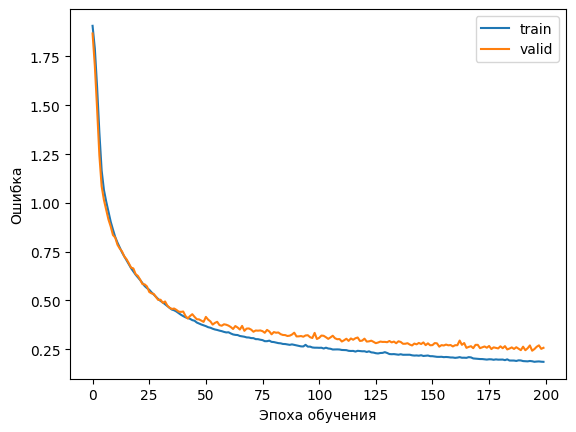

In [37]:
plt.plot(losses_FCNN_16_2['train'], label='train');
plt.plot(losses_FCNN_16_2['valid'], label='valid');
plt.legend();
plt.ylabel("–û—à–∏–±–∫–∞");
plt.xlabel("–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è");

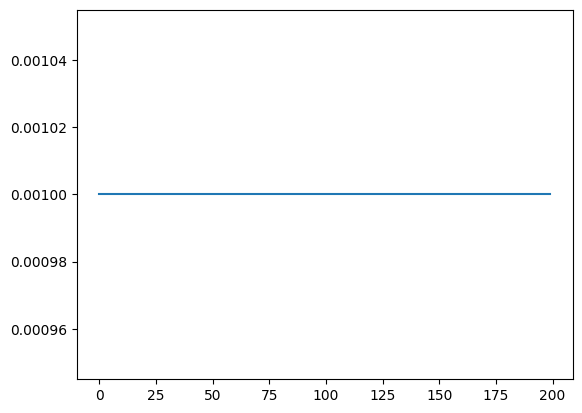

In [38]:
plt.plot(lr_FCNN_16_2);

In [39]:
print('Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è')
print(f'–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_16_2["train"][-1]:.5f}')
print(f'–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_16_2["valid"][-1]:.5f}')

Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è
–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.18549
–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.25727


–ü–æ—Å–º–æ—Ç—Ä–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö.


In [40]:
some_indexes = y_test_resampled.groupby('target').sample(n=1, random_state=42).index
X_some_modes = X_test_resampled_scaled.loc[some_indexes]
y_some_modes = y_test_resampled.loc[some_indexes]

FCNN_16_2.to("cpu")
FCNN_16_2.eval()
logits = FCNN_16_2(torch.tensor(X_some_modes.values, dtype=torch.float32))

predicted_classes = torch.argmax(logits, dim=1)

for target, predict in zip(y_some_modes.values, predicted_classes.detach().numpy()):
    print(f"–ò—Å—Ç–∏–Ω–∞ - {target[0]} >>> {encoder.inverse_transform([predict])[0]} - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ")

–ò—Å—Ç–∏–Ω–∞ - decreas_power_mode >>> decreas_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - full_power_mode >>> full_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - increas_power_mode >>> increas_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - partial_power_mode >>> partial_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - shutdown_mode >>> start_up_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - start_up_mode >>> shutdown_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - stopped_state_mode >>> stopped_state_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –≤ —Å–≤–æ–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö.

In [41]:
pd.DataFrame(torch.softmax(logits, dim=1).detach().numpy(), columns=encoder.classes_).applymap(lambda x: f'{x:.3f}')

decreas_power_mode full_power_mode increas_power_mode partial_power_mode  \
0              0.865           0.135              0.000              0.000   
1              0.044           0.952              0.004              0.000   
2              0.003           0.000              0.991              0.006   
3              0.001           0.000              0.019              0.980   
4              0.000           0.000              0.000              0.000   
5              0.000           0.000              0.000              0.000   
6              0.000           0.000              0.000              0.000   

  shutdown_mode start_up_mode stopped_state_mode  
0         0.000         0.000              0.000  
1         0.000         0.000              0.000  
2         0.000         0.000              0.000  
3         0.000         0.000              0.000  
4         0.436         0.564              0.000  
5         0.509         0.491              0.000  
6         0.000         0.000              1.000

#### –ê–Ω–∞–ª–∏–∑ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

In [42]:
FCNN_16_2.eval()
logits =  FCNN_16_2(torch.tensor(X_test_resampled_scaled.values, dtype=torch.float32))

probabilities = torch.softmax(logits, dim=1)
predicted_classes = torch.argmax(probabilities, dim=1)

y_test_pred_FCNN_16_2 = encoder.inverse_transform(predicted_classes)

**–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ—Ç–æ—á–Ω–æ—Å—Ç–µ–π**

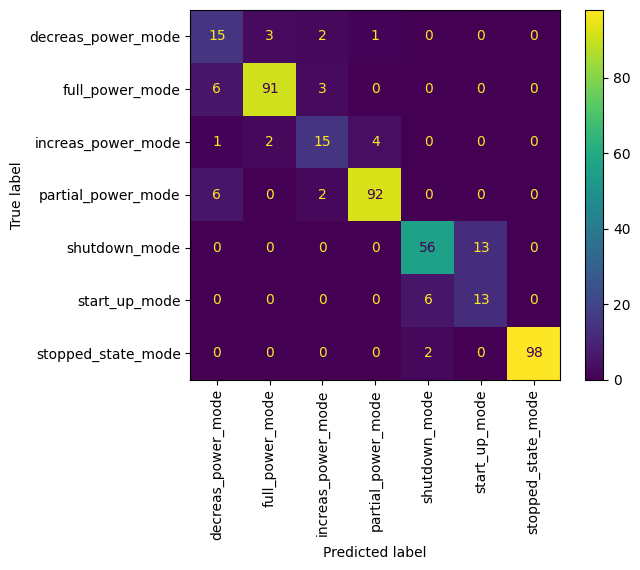

In [43]:
conf_mat = confusion_matrix(y_test_resampled, y_test_pred_FCNN_16_2)
ConfusionMatrixDisplay(conf_mat, display_labels=encoder.classes_).plot()
plt.xticks(rotation=90)
plt.show()

**Accuracy**

In [44]:
accuracy_classifier['FCNN_16_2'] = accuracy_score(y_test_resampled, y_test_pred_FCNN_16_2)

**Precision –∏ recall**

In [45]:
precision_classifier['FCNN_16_2'] = precision_score(y_test_resampled, y_test_pred_FCNN_16_2, average='macro', zero_division = np.nan)
recall_classifier['FCNN_16_2'] = recall_score(y_test_resampled, y_test_pred_FCNN_16_2, average='macro', zero_division = np.nan)

**F1**

In [46]:
f1_classifier['FCNN_16_2'] = f1_score(y_test_resampled, y_test_pred_FCNN_16_2, average='macro', zero_division = np.nan)

**–ó–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫**

In [47]:
print(f"accuracy - {accuracy_classifier['FCNN_16_2']*100:0.2f}%")
print(f"precision - {precision_classifier['FCNN_16_2']*100:0.2f}%")
print(f"recall - {recall_classifier['FCNN_16_2']*100:0.2f}%")
print(f"F1 - {f1_classifier['FCNN_16_2']*100:0.2f}%")

accuracy - 88.17%
precision - 78.41%
recall - 81.46%
F1 - 79.52%


### –ú–æ–¥–µ–ª—å ‚Ññ2
–£–≤–µ–ª–∏—á–∏–º —á–∏—Å–ª–æ —Å–∫—Ä—ã—Ç—ã—Ö —Å–ª–æ–µ–≤ –≤ –º–æ–¥–µ–ª–∏
#### –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [48]:
FCNN_16_4 = FCNN(16, 4).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(FCNN_16_4.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3,
                                           patience=30, threshold=0.0001)

FCNN_16_4, losses_FCNN_16_4, lr_FCNN_16_4 = train_model(
    FCNN_16_4, criterion, optimizer,
    scheduler, num_epochs=200)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:31<00:00,  6.36it/s]


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ —ç–ø–æ—Ö–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å.

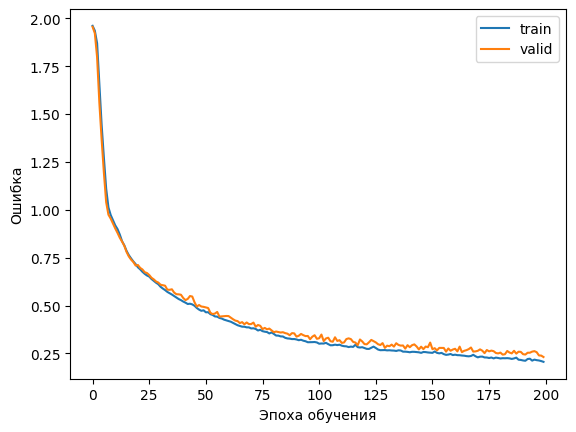

In [49]:
plt.plot(losses_FCNN_16_4['train'], label='train');
plt.plot(losses_FCNN_16_4['valid'], label='valid');
plt.legend();
plt.ylabel("–û—à–∏–±–∫–∞");
plt.xlabel("–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è");

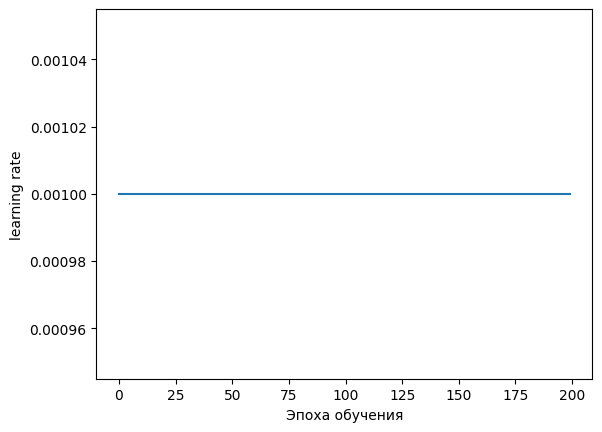

In [50]:
plt.plot(lr_FCNN_16_4);
plt.ylabel("learning rate");
plt.xlabel("–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è");

In [51]:
print('Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è')
print(f'–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_16_4["train"][-1]:.5f}')
print(f'–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_16_4["valid"][-1]:.5f}')

Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è
–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.20598
–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.23109


In [52]:
some_indexes = y_test_resampled.groupby('target').sample(n=1, random_state=42).index
X_some_modes = X_test_resampled_scaled.loc[some_indexes]
y_some_modes = y_test_resampled.loc[some_indexes]

FCNN_16_4.to("cpu")
FCNN_16_4.eval()
logits = FCNN_16_4(torch.tensor(X_some_modes.values, dtype=torch.float32))
predicted_classes = torch.argmax(logits, dim=1)

for target, predict in zip(y_some_modes.values, predicted_classes.detach().numpy()):
    print(f"–ò—Å—Ç–∏–Ω–∞ - {target[0]} >>> {encoder.inverse_transform([predict])[0]} - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ")

–ò—Å—Ç–∏–Ω–∞ - decreas_power_mode >>> decreas_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - full_power_mode >>> full_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - increas_power_mode >>> decreas_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - partial_power_mode >>> partial_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - shutdown_mode >>> start_up_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - start_up_mode >>> start_up_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - stopped_state_mode >>> stopped_state_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –≤ —Å–≤–æ–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö.

In [53]:
pd.DataFrame(torch.softmax(logits, dim=1).detach().numpy(), columns=encoder.classes_).applymap(lambda x: f'{x:.3f}')

decreas_power_mode full_power_mode increas_power_mode partial_power_mode  \
0              0.884           0.075              0.035              0.006   
1              0.015           0.946              0.039              0.001   
2              0.608           0.001              0.361              0.030   
3              0.006           0.001              0.000              0.993   
4              0.000           0.000              0.000              0.000   
5              0.000           0.000              0.000              0.000   
6              0.000           0.000              0.000              0.000   

  shutdown_mode start_up_mode stopped_state_mode  
0         0.000         0.000              0.000  
1         0.000         0.000              0.000  
2         0.000         0.000              0.000  
3         0.000         0.000              0.000  
4         0.264         0.736              0.000  
5         0.242         0.758              0.000  
6         0.000         0.000              1.000

#### –ê–Ω–∞–ª–∏–∑ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

In [54]:
FCNN_16_4.eval()
logits =  FCNN_16_4(torch.tensor(X_test_resampled_scaled.values, dtype=torch.float32))

probabilities = torch.softmax(logits, dim=1)
predicted_classes = torch.argmax(probabilities, dim=1)

y_test_pred_FCNN_16_4 = encoder.inverse_transform(predicted_classes)

**–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ—Ç–æ—á–Ω–æ—Å—Ç–µ–π**

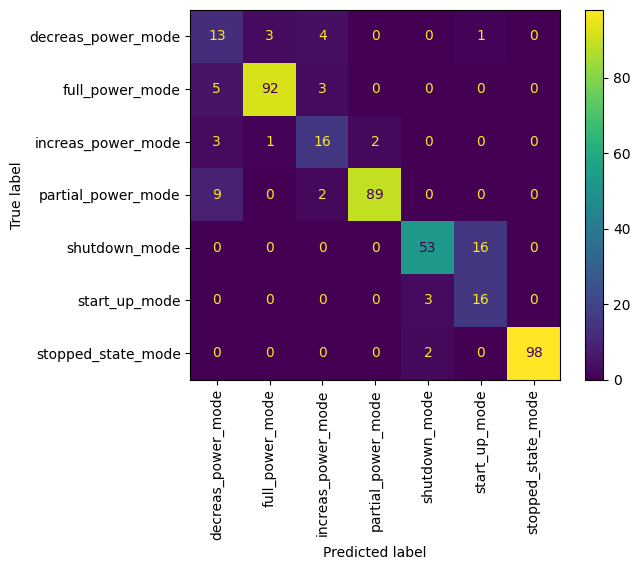

In [55]:
conf_mat = confusion_matrix(y_test_resampled, y_test_pred_FCNN_16_4)
ConfusionMatrixDisplay(conf_mat, display_labels=encoder.classes_).plot()
plt.xticks(rotation=90)
plt.show()

**Accuracy**

In [56]:
accuracy_classifier['FCNN_16_4'] = accuracy_score(y_test_resampled, y_test_pred_FCNN_16_4)

**Precision –∏ recall**

In [57]:
precision_classifier['FCNN_16_4'] = precision_score(y_test_resampled, y_test_pred_FCNN_16_4, average='macro', zero_division = np.nan)
recall_classifier['FCNN_16_4'] = recall_score(y_test_resampled, y_test_pred_FCNN_16_4, average='macro', zero_division = np.nan)

**F1**

In [58]:
f1_classifier['FCNN_16_4'] = f1_score(y_test_resampled, y_test_pred_FCNN_16_4, average='macro', zero_division = np.nan)

**–ó–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫**

In [59]:
print(f"accuracy - {accuracy_classifier['FCNN_16_4']*100:0.2f}%")
print(f"precision - {precision_classifier['FCNN_16_4']*100:0.2f}%")
print(f"recall - {recall_classifier['FCNN_16_4']*100:0.2f}%")
print(f"F1 - {f1_classifier['FCNN_16_4']*100:0.2f}%")

accuracy - 87.47%
precision - 77.26%
recall - 82.09%
F1 - 78.59%


### –ú–æ–¥–µ–ª—å ‚Ññ3
–£–≤–µ–ª–∏—á–∏–º —Ä–∞–∑–º–µ—Ä —Å–∫—Ä—ã—Ç—ã—Ö —Å–ª–æ–µ–≤ –≤ –º–æ–¥–µ–ª–∏
### –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [107]:
FCNN_32_4 = FCNN(32, 4).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(FCNN_32_4.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3,
                                           patience=30, threshold=0.0001)

FCNN_32_4, losses_FCNN_32_4, lr_FCNN_32_4 = train_model(
    FCNN_32_4, criterion, optimizer,
    scheduler, num_epochs=1000)

 17%|‚ñà‚ñã        | 174/1000 [00:37<02:57,  4.66it/s]


KeyboardInterrupt: 

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ —ç–ø–æ—Ö–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å.

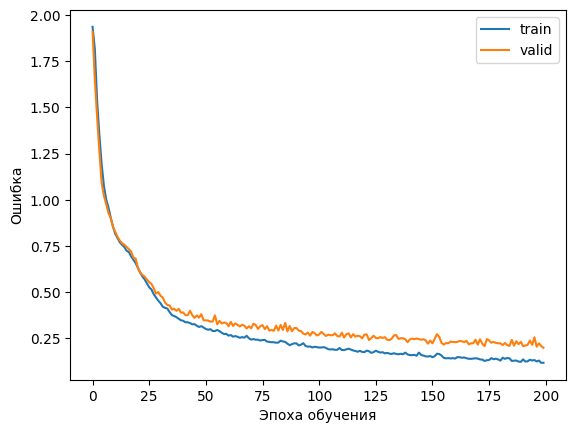

In [61]:
plt.plot(losses_FCNN_32_4['train'], label='train');
plt.plot(losses_FCNN_32_4['valid'], label='valid');
plt.legend();
plt.ylabel("–û—à–∏–±–∫–∞");
plt.xlabel("–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è");

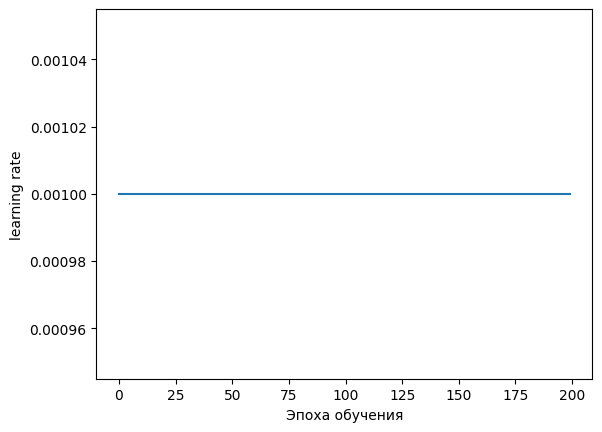

In [62]:
plt.plot(lr_FCNN_32_4);
plt.ylabel("learning rate");
plt.xlabel("–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è");

In [63]:
print('Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è')
print(f'–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_32_4["train"][-1]:.5f}')
print(f'–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_32_4["valid"][-1]:.5f}')

Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è
–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.11682
–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.19803


–ü–æ—Å–º–æ—Ç—Ä–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö.

In [64]:
some_indexes = y_test_resampled.groupby('target').sample(n=1, random_state=42).index
X_some_modes = X_test_resampled_scaled.loc[some_indexes]
y_some_modes = y_test_resampled.loc[some_indexes]

FCNN_32_4.to("cpu")
FCNN_32_4.eval()
logits = FCNN_32_4(torch.tensor(X_some_modes.values, dtype=torch.float32))
predicted_classes = torch.argmax(logits, dim=1)

for target, predict in zip(y_some_modes.values, predicted_classes.detach().numpy()):
    print(f"–ò—Å—Ç–∏–Ω–∞ - {target[0]} >>> {encoder.inverse_transform([predict])[0]} - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ")

–ò—Å—Ç–∏–Ω–∞ - decreas_power_mode >>> decreas_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - full_power_mode >>> full_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - increas_power_mode >>> increas_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - partial_power_mode >>> partial_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - shutdown_mode >>> shutdown_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - start_up_mode >>> start_up_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - stopped_state_mode >>> stopped_state_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –≤ —Å–≤–æ–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö.

In [65]:
pd.DataFrame(torch.softmax(logits, dim=1).detach().numpy(), columns=encoder.classes_).applymap(lambda x: f'{x:.3f}')

decreas_power_mode full_power_mode increas_power_mode partial_power_mode  \
0              0.999           0.001              0.000              0.000   
1              0.005           0.995              0.000              0.000   
2              0.052           0.003              0.897              0.048   
3              0.012           0.001              0.000              0.987   
4              0.000           0.000              0.000              0.000   
5              0.000           0.000              0.000              0.000   
6              0.000           0.000              0.000              0.000   

  shutdown_mode start_up_mode stopped_state_mode  
0         0.000         0.000              0.000  
1         0.000         0.000              0.000  
2         0.000         0.000              0.000  
3         0.000         0.000              0.000  
4         0.562         0.438              0.000  
5         0.312         0.688              0.000  
6         0.000         0.000              1.000

#### –ê–Ω–∞–ª–∏–∑ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

In [66]:
FCNN_32_4.eval()
logits =  FCNN_32_4(torch.tensor(X_test_resampled_scaled.values, dtype=torch.float32))

probabilities = torch.softmax(logits, dim=1)
predicted_classes = torch.argmax(probabilities, dim=1)

y_test_pred_FCNN_32_4 = encoder.inverse_transform(predicted_classes)

**–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ—Ç–æ—á–Ω–æ—Å—Ç–µ–π**

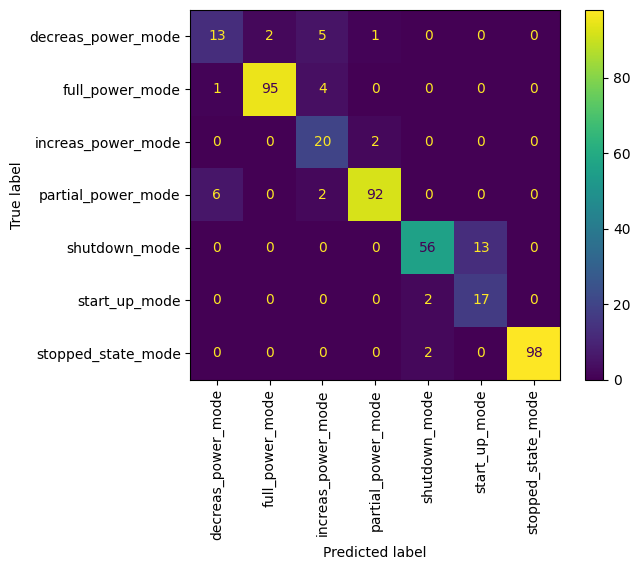

In [67]:
conf_mat = confusion_matrix(y_test_resampled, y_test_pred_FCNN_32_4)
ConfusionMatrixDisplay(conf_mat, display_labels=encoder.classes_).plot()
plt.xticks(rotation=90)
plt.show()

**Accuracy**

In [68]:
accuracy_classifier['FCNN_32_4'] = accuracy_score(y_test_resampled, y_test_pred_FCNN_32_4)

**Precision –∏ recall**

In [69]:
precision_classifier['FCNN_32_4'] = precision_score(y_test_resampled, y_test_pred_FCNN_32_4, average='macro', zero_division = np.nan)
recall_classifier['FCNN_32_4'] = recall_score(y_test_resampled, y_test_pred_FCNN_32_4, average='macro', zero_division = np.nan)

**F1**

In [70]:
f1_classifier['FCNN_32_4'] = f1_score(y_test_resampled, y_test_pred_FCNN_32_4, average='macro', zero_division = np.nan)

**–ó–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫**

In [71]:
print(f"accuracy - {accuracy_classifier['FCNN_32_4']*100:0.2f}%")
print(f"precision - {precision_classifier['FCNN_32_4']*100:0.2f}%")
print(f"recall - {recall_classifier['FCNN_32_4']*100:0.2f}%")
print(f"F1 - {f1_classifier['FCNN_32_4']*100:0.2f}%")

accuracy - 90.72%
precision - 82.04%
recall - 86.92%
F1 - 83.56%


### –ú–æ–¥–µ–ª—å ‚Ññ4

**Batch Normalization (BatchNorm)**  

**Batch Normalization (–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ –±–∞—Ç—á–∞–º, BatchNorm)** ‚Äì —ç—Ç–æ –º–µ—Ç–æ–¥, –∫–æ—Ç–æ—Ä—ã–π —Å—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç –∏ —É—Å–∫–æ—Ä—è–µ—Ç –æ–±—É—á–µ–Ω–∏–µ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π, **–Ω–æ—Ä–º–∞–ª–∏–∑—É—è –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –∫–∞–∂–¥–æ–º —Å–ª–æ–µ**.  

**–ì–ª–∞–≤–Ω–∞—è –∏–¥–µ—è:**  
–ö–∞–∂–¥—ã–π —Å–ª–æ–π –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ –ø–æ–ª—É—á–∞–µ—Ç –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç —Å–∏–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞—Ç—å—Å—è –ø–æ –º–∞—Å—à—Ç–∞–±—É. BatchNorm **–≤—ã—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç –∏—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ**, –ø—Ä–∏–≤–æ–¥—è –∫ –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ–º—É –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º—É —Å–ø—É—Å–∫—É.  

---

**–ó–∞—á–µ–º –Ω—É–∂–µ–Ω BatchNorm?**  
**–°—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫** (–ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–∞–µ—Ç "–≤–∑—Ä—ã–≤" –∏–ª–∏ "–∑–∞—Ç—É—Ö–∞–Ω–∏–µ" –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤).  
**–ü–æ–∑–≤–æ–ª—è–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–π `learning rate`**, —É—Å–∫–æ—Ä—è—è –æ–±—É—á–µ–Ω–∏–µ.  
**–£–º–µ–Ω—å—à–∞–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤**.  
**–î–æ–±–∞–≤–ª—è–µ—Ç –Ω–µ–±–æ–ª—å—à–æ–π —ç—Ñ—Ñ–µ–∫—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏** (—Å—Ö–æ–∂–∏–π —Å Dropout).  


---

**–ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å BatchNorm?**  
–í **–≥–ª—É–±–æ–∫–∏—Ö –Ω–µ–π—Ä–æ—Å–µ—Ç—è—Ö**, —á—Ç–æ–±—ã —É–ª—É—á—à–∏—Ç—å —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å.  
–í **—Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö –Ω–µ–π—Ä–æ—Å–µ—Ç—è—Ö (CNN)** –¥–ª—è —Å—Ç–∞–±–∏–ª–∏–∑–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è.  
–í **–ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã—Ö —Å–µ—Ç—è—Ö (MLP)**, –µ—Å–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–∏–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –ø–æ –º–∞—Å—à—Ç–∞–±—É.  

–ù–µ –Ω—É–∂–µ–Ω –≤ **–º–∞–ª–µ–Ω—å–∫–∏—Ö —Å–µ—Ç—è—Ö** –∏–ª–∏ **–µ—Å–ª–∏ —É–∂–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è LayerNorm / GroupNorm**.


In [72]:
class FCNN_BN(nn.Module):
  def __init__(
      self, hidden_size=512, hidden_num=1,
      # dropout_rate=0
      ):
    super(FCNN_BN, self).__init__()

    # –í—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
    self.input_layer = nn.Sequential(
        nn.Linear(INPUT_SIZE, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.ReLU(),
    )

    # –°–∫—Ä—ã—Ç—ã–µ —Å–ª–æ–∏
    self.hidden_layers = nn.ModuleList()
    for _ in range(hidden_num):
        self.hidden_layers.append(
            nn.Sequential(
                nn.Linear(hidden_size, hidden_size),
                nn.BatchNorm1d(hidden_size),
                nn.ReLU(),
            )
        )

    # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
    self.output_layer = nn.Linear(hidden_size, OUTPUT_SIZE)

  def forward(self, x):
    x = self.input_layer(x)

    for layer in self.hidden_layers:
        x = layer(x)

    x = self.output_layer(x)
    return x

#### –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [73]:
FCNN_BN_32_4 = FCNN_BN(32, 4).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(FCNN_BN_32_4.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3,
                                           patience=30, threshold=0.0001)

FCNN_BN_32_4, losses_FCNN_BN_32_4, lr_FCNN_BN_32_4 = train_model(
    FCNN_BN_32_4, criterion, optimizer,
    scheduler, num_epochs=200)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:43<00:00,  4.63it/s]


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ —ç–ø–æ—Ö–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å.

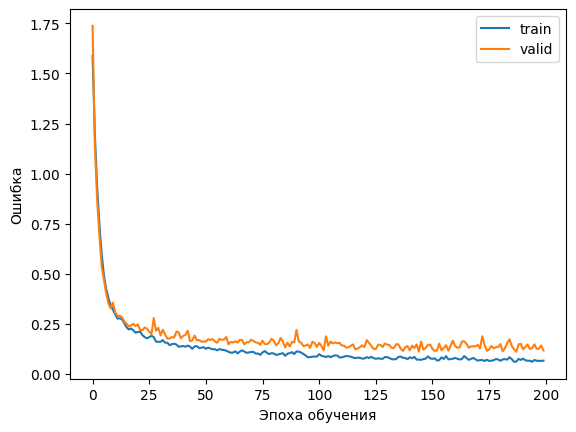

In [108]:
plt.plot(losses_FCNN_BN_32_4['train'], label='train');
plt.plot(losses_FCNN_BN_32_4['valid'], label='valid');
plt.legend();
plt.ylabel("–û—à–∏–±–∫–∞");
plt.xlabel("–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è");

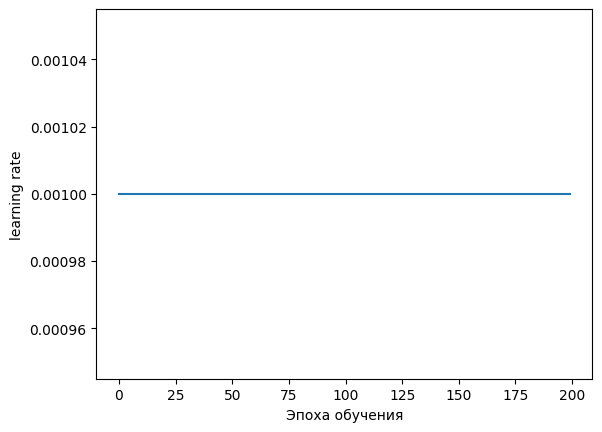

In [75]:
plt.plot(lr_FCNN_BN_32_4);
plt.ylabel("learning rate");
plt.xlabel("–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è");

In [76]:
print('Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è')
print(f'–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_BN_32_4["train"][-1]:.5f}')
print(f'–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_BN_32_4["valid"][-1]:.5f}')

Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è
–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.06567
–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.11611


–ü–æ—Å–º–æ—Ç—Ä–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö.

In [77]:
some_indexes = y_test_resampled.groupby('target').sample(n=1, random_state=42).index
X_some_modes = X_test_resampled_scaled.loc[some_indexes]
y_some_modes = y_test_resampled.loc[some_indexes]

FCNN_BN_32_4.to("cpu")
FCNN_BN_32_4.eval()
logits = FCNN_BN_32_4(torch.tensor(X_some_modes.values, dtype=torch.float32))
predicted_classes = torch.argmax(logits, dim=1)

for target, predict in zip(y_some_modes.values, predicted_classes.detach().numpy()):
    print(f"–ò—Å—Ç–∏–Ω–∞ - {target[0]} >>> {encoder.inverse_transform([predict])[0]} - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ")

–ò—Å—Ç–∏–Ω–∞ - decreas_power_mode >>> decreas_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - full_power_mode >>> full_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - increas_power_mode >>> increas_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - partial_power_mode >>> partial_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - shutdown_mode >>> shutdown_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - start_up_mode >>> start_up_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - stopped_state_mode >>> stopped_state_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –≤ —Å–≤–æ–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö.

In [78]:
pd.DataFrame(torch.softmax(logits, dim=1).detach().numpy(), columns=encoder.classes_).applymap(lambda x: f'{x:.3f}')

decreas_power_mode full_power_mode increas_power_mode partial_power_mode  \
0              1.000           0.000              0.000              0.000   
1              0.000           1.000              0.000              0.000   
2              0.000           0.013              0.689              0.296   
3              0.000           0.000              0.000              1.000   
4              0.000           0.000              0.000              0.000   
5              0.000           0.000              0.000              0.000   
6              0.000           0.000              0.000              0.000   

  shutdown_mode start_up_mode stopped_state_mode  
0         0.000         0.000              0.000  
1         0.000         0.000              0.000  
2         0.000         0.001              0.001  
3         0.000         0.000              0.000  
4         0.907         0.093              0.000  
5         0.095         0.905              0.000  
6         0.000         0.000              0.999

#### –ê–Ω–∞–ª–∏–∑ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

In [79]:
FCNN_BN_32_4.eval()
logits =  FCNN_BN_32_4(
    torch.tensor(X_test_resampled_scaled.values, dtype=torch.float32))

probabilities = torch.softmax(logits, dim=1)
predicted_classes = torch.argmax(probabilities, dim=1)

y_test_pred_FCNN_BN_32_4 = encoder.inverse_transform(predicted_classes)

**–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ—Ç–æ—á–Ω–æ—Å—Ç–µ–π**

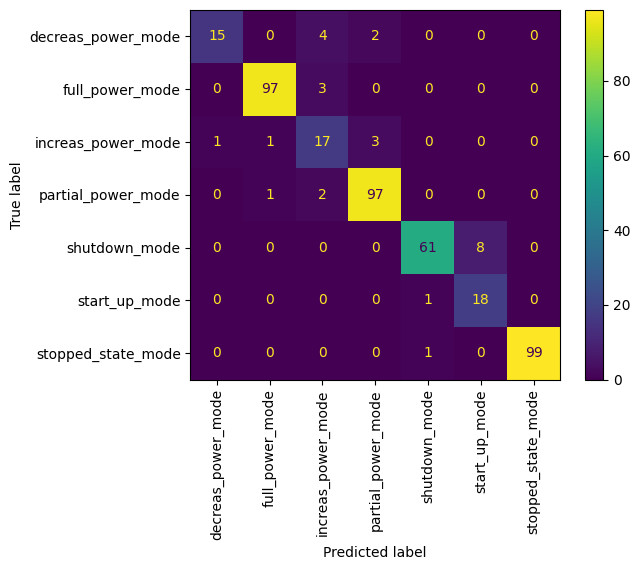

In [80]:
conf_mat = confusion_matrix(y_test_resampled, y_test_pred_FCNN_BN_32_4)
ConfusionMatrixDisplay(conf_mat, display_labels=encoder.classes_).plot()
plt.xticks(rotation=90)
plt.show()

**Accuracy**

In [81]:
accuracy_classifier['FCNN_BN_32_4'] = accuracy_score(y_test_resampled, y_test_pred_FCNN_BN_32_4)

**Precision –∏ recall**

In [82]:
precision_classifier['FCNN_BN_32_4'] = precision_score(y_test_resampled, y_test_pred_FCNN_BN_32_4, average='macro', zero_division = np.nan)
recall_classifier['FCNN_BN_32_4'] = recall_score(y_test_resampled, y_test_pred_FCNN_BN_32_4, average='macro', zero_division = np.nan)

**F1**

In [83]:
f1_classifier['FCNN_BN_32_4'] = f1_score(y_test_resampled, y_test_pred_FCNN_BN_32_4, average='macro', zero_division = np.nan)

**–ó–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫**

In [84]:
print(f"accuracy - {accuracy_classifier['FCNN_BN_32_4']*100:0.2f}%")
print(f"precision - {precision_classifier['FCNN_BN_32_4']*100:0.2f}%")
print(f"recall - {recall_classifier['FCNN_BN_32_4']*100:0.2f}%")
print(f"F1 - {f1_classifier['FCNN_BN_32_4']*100:0.2f}%")

accuracy - 93.74%
precision - 88.32%
recall - 89.26%
F1 - 88.19%


### –ú–æ–¥–µ–ª—å ‚Ññ5

**Dropout**  

`Dropout` ‚Äì —ç—Ç–æ **—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è**, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–º–æ–≥–∞–µ—Ç **–ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ** –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π, —Å–ª—É—á–∞–π–Ω–æ **"–æ—Ç–∫–ª—é—á–∞—è" –Ω–µ–π—Ä–æ–Ω—ã** –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.  

**–ò–¥–µ—è:**  
–í–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è —Å **–Ω–µ–∫–æ—Ç–æ—Ä–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é (p)** –Ω–µ–π—Ä–æ–Ω—ã –≤—Ä–µ–º–µ–Ω–Ω–æ –æ—Ç–∫–ª—é—á–∞—é—Ç—Å—è (–∏—Ö –≤—ã—Ö–æ–¥—ã —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –Ω—É–ª—è–º–∏). –≠—Ç–æ –∑–∞—Å—Ç–∞–≤–ª—è–µ—Ç –º–æ–¥–µ–ª—å **–Ω–µ –∑–∞–≤–∏—Å–µ—Ç—å —Å–ª–∏—à–∫–æ–º —Å–∏–ª—å–Ω–æ –æ—Ç –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–æ–≤** –∏ –¥–µ–ª–∞—Ç—å –±–æ–ª–µ–µ **—É—Å—Ç–æ–π—á–∏–≤—ã–µ –æ–±–æ–±—â–µ–Ω–∏—è**.  

---

### **–ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç Dropout?**
1. **–í–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è:**  
   - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –Ω–µ–π—Ä–æ–Ω–∞ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é \( p \) –∑–∞–Ω—É–ª—è–µ—Ç—Å—è –µ–≥–æ –≤—ã—Ö–æ–¥.  
   - –û—Å—Ç–∞–≤—à–∏–µ—Å—è –Ω–µ–π—Ä–æ–Ω—ã —Ä–∞–±–æ—Ç–∞—é—Ç —Å —É–≤–µ–ª–∏—á–µ–Ω–Ω–æ–π —Å–∏–ª–æ–π \( 1/(1-p) \), —á—Ç–æ–±—ã –∫–æ–º–ø–µ–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –ø–æ—Ç–µ—Ä–∏.  

2. **–í–æ –≤—Ä–µ–º—è –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞ (–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π):**  
   - Dropout **–Ω–µ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è** ‚Äì –≤—Å–µ –Ω–µ–π—Ä–æ–Ω—ã —Ä–∞–±–æ—Ç–∞—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ.  
   - –ù–æ —Ç–∞–∫ –∫–∞–∫ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –∞–∫—Ç–∏–≤–Ω—ã–µ –Ω–µ–π—Ä–æ–Ω—ã —É—Å–∏–ª–∏–≤–∞–ª–∏—Å—å, –∏—Ö –≤—ã—Ö–æ–¥ –æ—Å—Ç–∞–µ—Ç—Å—è –Ω–µ–∏–∑–º–µ–Ω–Ω—ã–º.  

In [85]:
class FCNN_BN_DO(nn.Module):
  def __init__(
      self, hidden_size=512, hidden_num=1,
      dropout_rate=0.5
      ):
    super(FCNN_BN_DO, self).__init__()

    # –í—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
    self.input_layer = nn.Sequential(
        nn.Linear(INPUT_SIZE, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.ReLU(),
        nn.Dropout(dropout_rate)
    )

    # –°–∫—Ä—ã—Ç—ã–µ —Å–ª–æ–∏
    self.hidden_layers = nn.ModuleList()
    for _ in range(hidden_num):
        self.hidden_layers.append(
            nn.Sequential(
                nn.Linear(hidden_size, hidden_size),
                nn.BatchNorm1d(hidden_size),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            )
        )

    # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
    self.output_layer = nn.Linear(hidden_size, OUTPUT_SIZE)

  def forward(self, x):
    x = self.input_layer(x)

    for layer in self.hidden_layers:
        x = layer(x)

    x = self.output_layer(x)
    return x

#### –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [86]:
FCNN_BN_DO_32_4 = FCNN_BN_DO(32, 4, 0.5).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    FCNN_BN_DO_32_4.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3,
                                           patience=30, threshold=0.0001)

FCNN_BN_DO_32_4, losses_FCNN_BN_DO_32_4, lr_FCNN_BN_DO_32_4 = train_model(
    FCNN_BN_DO_32_4, criterion, optimizer,
    scheduler, num_epochs=200)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:45<00:00,  4.35it/s]


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ —ç–ø–æ—Ö–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å.

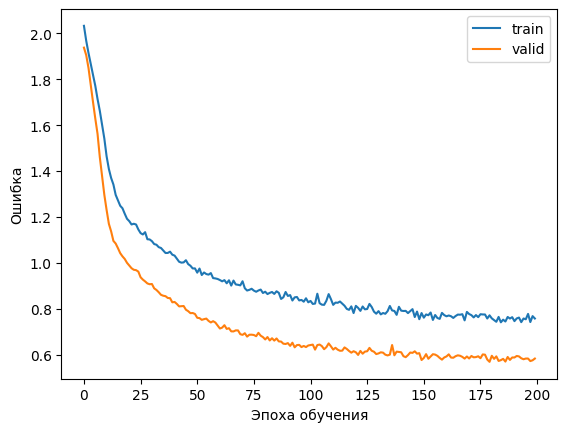

In [87]:
plt.plot(losses_FCNN_BN_DO_32_4['train'], label='train');
plt.plot(losses_FCNN_BN_DO_32_4['valid'], label='valid');
plt.legend();
plt.ylabel("–û—à–∏–±–∫–∞");
plt.xlabel("–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è");

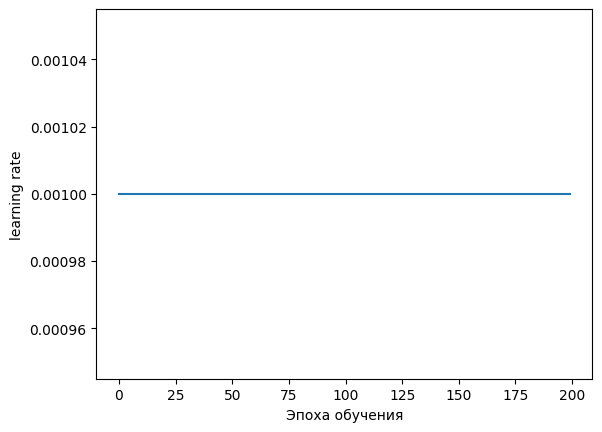

In [88]:
plt.plot(lr_FCNN_BN_DO_32_4);
plt.ylabel("learning rate");
plt.xlabel("–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è");

In [89]:
print('Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è')
print(f'–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_BN_DO_32_4["train"][-1]:.5f}')
print(f'–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {losses_FCNN_BN_DO_32_4["valid"][-1]:.5f}')

Loss –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è
–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.75859
–ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.58429


–ü–æ—Å–º–æ—Ç—Ä–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö.

In [90]:
some_indexes = y_test_resampled.groupby('target').sample(n=1, random_state=42).index
X_some_modes = X_test_resampled_scaled.loc[some_indexes]
y_some_modes = y_test_resampled.loc[some_indexes]

FCNN_BN_DO_32_4.to("cpu")
FCNN_BN_DO_32_4.eval()
logits = FCNN_BN_DO_32_4(torch.tensor(X_some_modes.values, dtype=torch.float32))
predicted_classes = torch.argmax(logits, dim=1)

for target, predict in zip(y_some_modes.values, predicted_classes.detach().numpy()):
    print(f"–ò—Å—Ç–∏–Ω–∞ - {target[0]} >>> {encoder.inverse_transform([predict])[0]} - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ")

–ò—Å—Ç–∏–Ω–∞ - decreas_power_mode >>> full_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - full_power_mode >>> full_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - increas_power_mode >>> increas_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - partial_power_mode >>> partial_power_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - shutdown_mode >>> start_up_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - start_up_mode >>> start_up_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
–ò—Å—Ç–∏–Ω–∞ - stopped_state_mode >>> stopped_state_mode - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –≤ —Å–≤–æ–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö.

In [91]:
pd.DataFrame(torch.softmax(logits, dim=1).detach().numpy(), columns=encoder.classes_).applymap(lambda x: f'{x:.3f}')

decreas_power_mode full_power_mode increas_power_mode partial_power_mode  \
0              0.243           0.712              0.045              0.000   
1              0.308           0.566              0.126              0.000   
2              0.391           0.104              0.466              0.037   
3              0.131           0.004              0.165              0.691   
4              0.000           0.000              0.000              0.000   
5              0.000           0.000              0.000              0.000   
6              0.000           0.000              0.000              0.000   

  shutdown_mode start_up_mode stopped_state_mode  
0         0.000         0.000              0.000  
1         0.000         0.000              0.000  
2         0.000         0.002              0.000  
3         0.002         0.002              0.005  
4         0.220         0.780              0.000  
5         0.223         0.777              0.000  
6         0.021         0.000              0.979

#### –ê–Ω–∞–ª–∏–∑ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

In [92]:
FCNN_BN_DO_32_4.eval()
logits =  FCNN_BN_DO_32_4(
    torch.tensor(X_test_resampled_scaled.values, dtype=torch.float32))

probabilities = torch.softmax(logits, dim=1)
predicted_classes = torch.argmax(probabilities, dim=1)

y_test_pred_FCNN_BN_DO_32_4 = encoder.inverse_transform(predicted_classes)

**–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ—Ç–æ—á–Ω–æ—Å—Ç–µ–π**

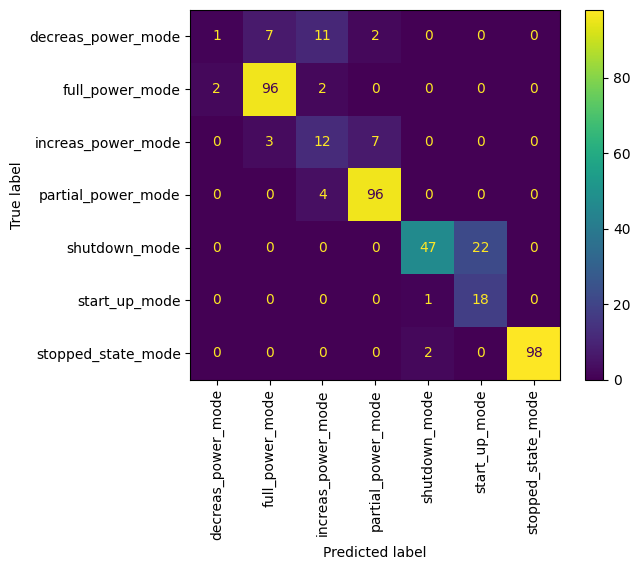

In [93]:
conf_mat = confusion_matrix(y_test_resampled, y_test_pred_FCNN_BN_DO_32_4)
ConfusionMatrixDisplay(conf_mat, display_labels=encoder.classes_).plot()
plt.xticks(rotation=90)
plt.show()

**Accuracy**

In [94]:
accuracy_classifier['FCNN_BN_DO_32_4'] = accuracy_score(
    y_test_resampled, y_test_pred_FCNN_BN_DO_32_4)

**Precision –∏ recall**

In [95]:
precision_classifier['FCNN_BN_DO_32_4'] = precision_score(
    y_test_resampled, y_test_pred_FCNN_BN_DO_32_4,
    average='macro', zero_division = np.nan)
recall_classifier['FCNN_BN_DO_32_4'] = recall_score(
    y_test_resampled, y_test_pred_FCNN_BN_DO_32_4,
    average='macro', zero_division = np.nan)

**F1**

In [96]:
f1_classifier['FCNN_BN_DO_32_4'] = f1_score(
    y_test_resampled, y_test_pred_FCNN_BN_DO_32_4,
    average='macro', zero_division = np.nan)

**–ó–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫**

In [97]:
print(f"accuracy - {accuracy_classifier['FCNN_BN_DO_32_4']*100:0.2f}%")
print(f"precision - {precision_classifier['FCNN_BN_DO_32_4']*100:0.2f}%")
print(f"recall - {recall_classifier['FCNN_BN_DO_32_4']*100:0.2f}%")
print(f"F1 - {f1_classifier['FCNN_BN_DO_32_4']*100:0.2f}%")

accuracy - 85.38%
precision - 70.82%
recall - 73.17%
F1 - 68.75%


## –°—Ä–∞–≤–Ω–µ–Ω–∏–µ

In [98]:
df = pd.DataFrame(
    [precision_classifier, recall_classifier, f1_classifier, accuracy_classifier],
    index=['Precision', 'Recall', 'F1-score', 'Accuracy'])
df

FCNN_16_2  FCNN_16_4  FCNN_32_4  FCNN_BN_32_4  FCNN_BN_DO_32_4
Precision   0.784129   0.772619   0.820423      0.883241         0.708153
Recall      0.814558   0.820935   0.869210      0.892634         0.731657
F1-score    0.795204   0.785900   0.835559      0.881947         0.687504
Accuracy    0.881671   0.874710   0.907193      0.937355         0.853828

## –ö–∞–∫–∏–µ —Å–∏–≥–Ω–∞–ª—ã –æ–∫–∞–∑—ã–≤–∞—é—Ç —Å–∞–º–æ–µ —Å–∏–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –æ—Ç–≤–µ—Ç –º–æ–¥–µ–ª–∏?

**SHAP**  

SHAP (**SHapley Additive exPlanations**) ‚Äì —ç—Ç–æ –º–µ—Ç–æ–¥ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä—ã–π **–ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤–∫–ª–∞–¥ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ**.  

---

**–ß—Ç–æ –æ–∑–Ω–∞—á–∞—é—Ç SHAP-–∑–Ω–∞—á–µ–Ω–∏—è?**
SHAP value –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, **–Ω–∞—Å–∫–æ–ª—å–∫–æ –∫–∞–∂–¥—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏** –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –±–∞–∑–æ–≤–æ–≥–æ —É—Ä–æ–≤–Ω—è (—Å—Ä–µ–¥–Ω–µ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è).  

- **–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ SHAP-–∑–Ω–∞—á–µ–Ω–∏—è** ‚Üí –ü—Ä–∏–∑–Ω–∞–∫ —Å–Ω–∏–∂–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞  
- **–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ SHAP-–∑–Ω–∞—á–µ–Ω–∏—è** ‚Üí –ü—Ä–∏–∑–Ω–∞–∫ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞  
- **–ß–µ–º –±–æ–ª—å—à–µ –ø–æ –º–æ–¥—É–ª—é SHAP value**, —Ç–µ–º **–≤–∞–∂–Ω–µ–µ** —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è  

In [99]:
!pip install shap

PermutationExplainer explainer: 432it [00:39,  8.59it/s]                         


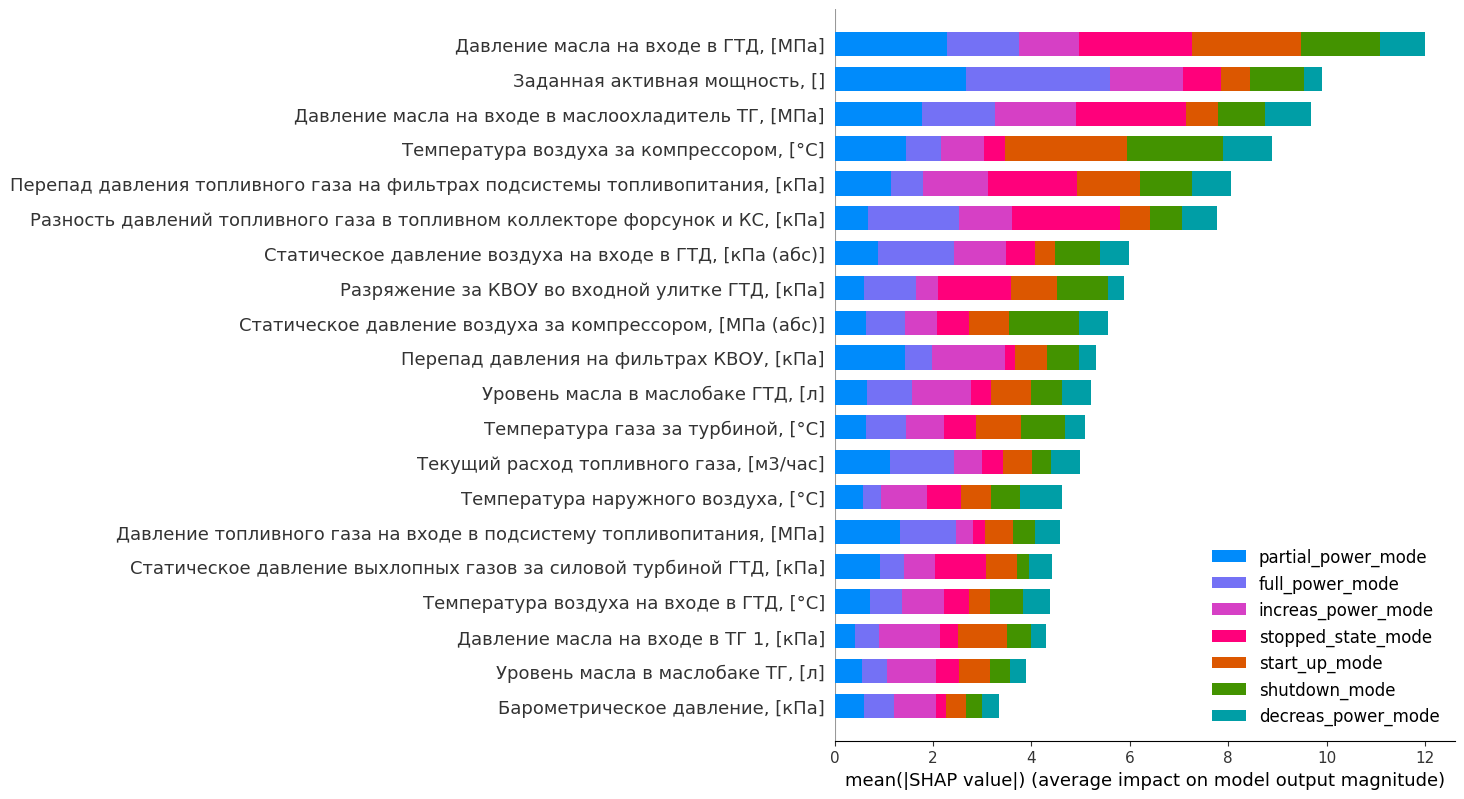

In [105]:
import shap

explainer = shap.Explainer(lambda x: FCNN_BN_32_4(
    torch.tensor(x.values, dtype=torch.float32)), X_train_resampled_scaled)
shap_values = explainer(X_test_resampled_scaled)

shap.summary_plot(shap_values,
                  X_test_resampled_scaled,
                  feature_names=[kks_to_description[kks] for kks in X_test_resampled_scaled.columns],
                  class_names=target_columns)